In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from geopy.distance import geodesic


In [33]:
data = pd.read_csv('Yelp Reviews.csv')
data

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5
...,...,...,...,...,...,...,...,...,...,...,...
227576,2005-03-08,"It's not the Four Seasons, but more appropriat...",K4FAia2Iy5MVnmBLfS-mCg,WnY4HPJIYNXOPQH2mFzl2Q,THEhotel at Mandalay Bay,Hotels & Travel,Las Vegas,NV,36.092988,-115.177838,4.0
227577,2005-03-03,There is nothing better than happy hour on the...,G8Q9rASB6YI2ICBkkpwvcw,RgBq9TFI8q6-vCvF6wOMVg,Genna's Lounge,Bars,Madison,WI,43.072720,-89.384389,4.0
227578,2005-03-03,Easily my favorite place to eat in Madison. G...,8ITVDdfK07owxCA1x878Vw,3nwskbfFgsSjVe6T8keTeg,Lao Laan-Xang Restaurant,Thai,Madison,WI,43.083166,-89.364985,4.0
227579,2005-03-01,"Spacious, luxurious rooms that definitely meri...",WPOKvkacSKHx_bIG1alFiA,-7yF42k0CcJhtPw51oaOqQ,Bellagio,Hotels & Travel,Las Vegas,NV,36.112024,-115.174593,4.0


In [3]:
# pwd

1. How many unique restaurants could be found in this data set?

In [27]:
#vers1
number_of_unique_restaurants = data['Business_ID'].nunique()
number_of_unique_restaurants

30276

In [5]:
#vers2
number_of_unique_restaurants = set(data['Business_ID'])
number_of_unique_restaurants = len(number_of_unique_restaurants)
number_of_unique_restaurants

30276

2. Which restaurant received the highest number of reviews? What about percentage-
wise?

In [6]:

review_counts = data.groupby('Business_ID')['Review_Text'].count() # count the number of reviews foreach resturant
# print(review_counts)

most_reviews_id = review_counts.idxmax()
most_reviews_count = review_counts.max()
most_reviews_name = data[data['Business_ID'] == most_reviews_id]['Business_Name'].iloc[0]

total_reviews = review_counts.sum()
# print(total_reviews)


review_percentage = (review_counts / total_reviews) * 100 #calculate the percentage of reviews foreach resturant
highest_percentage_id = review_percentage.idxmax()
highest_percentage_value = review_percentage.max()
highest_percentage_name = data[data['Business_ID'] == highest_percentage_id]['Business_Name'].iloc[0]

 
print(f'The highest percentage of reviews is: {highest_percentage_name}  with {highest_percentage_value}% of reviews')


The highest percentage of reviews is: Mon Ami Gabi  with 0.376131470252219% of reviews


3. Which cities have got at least one 5-star review in Nevada (NV) state?

In [7]:
nevada_reviews = data[data['State'] == 'NV']
# print(nevada_reviews)
five_star = nevada_reviews[nevada_reviews['Avg_Business_Star_Rating'] == 5]['City'].unique()
for i in five_star:
    print(i)

Las Vegas
Henderson
Boulder City
Nellis


4. Which city has the highest number of reviews in the Business Category of “Hotels &
Travel”? What about percentage-wise?

In [10]:
reviews_hotel_trvel = data[data['Business_Category'] == 'Hotels & Travel']
count_of_reviews = reviews_hotel_trvel['City'].value_counts()

most_reviews = count_of_reviews.idxmax()
count_of_most_reviews = count_of_reviews.max()
total_reviews = count_of_reviews.sum()

review_percentage_by_city = (count_of_reviews / total_reviews) * 100
# print((review_percentage_by_city))
df = review_percentage_by_city.to_frame()
print(f"{review_percentage_by_city.index[0]} { review_percentage_by_city.values[0]:.2f}")


Las Vegas 77.64


5. At what day of the week people are more likely to post their reviews?

In [9]:
data['Review_Date'] = pd.to_datetime(data['Review_Date'])
data['Day_of_Week'] = data['Review_Date'].dt.day_name()
reviews_per_day = data['Day_of_Week'].value_counts()
most_reviews_day = reviews_per_day.idxmax()
most_reviews_count = reviews_per_day.max()

print(reviews_per_day)
print(f'{most_reviews_day} with {most_reviews_count} reviews is the highest one.')

Day_of_Week
Monday       36446
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: count, dtype: int64
Monday with 36446 reviews is the highest one.


6. Showcase if there are any trends regarding restaurant performance as time goes by.

C:\Users\narmi\AppData\Local\Temp\ipykernel_11408\880427012.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').agg({'Avg_Business_Star_Rating': 'mean', 'Review_Text': 'count'})


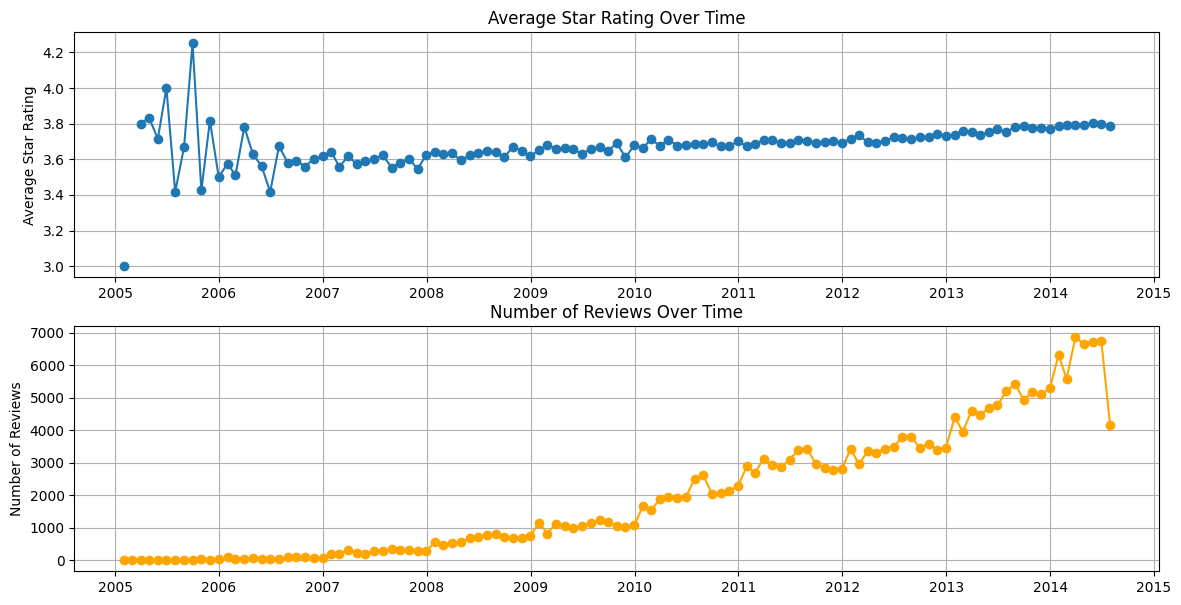

In [20]:
data['Review_Date'] = pd.to_datetime(data['Review_Date'])
data.set_index('Review_Date', inplace=True)

monthly_data = data.resample('M').agg({'Avg_Business_Star_Rating': 'mean', 'Review_Text': 'count'})

plt.figure(figsize=(14, 7))

#star reting over the time
plt.subplot(2, 1, 1)
plt.plot(monthly_data.index, monthly_data['Avg_Business_Star_Rating'], marker='o')
plt.title('Average Star Rating Over Time')
plt.ylabel('Average Star Rating')
plt.grid(True)

# changes of the number of reviews over the time (review_text is the count of the reviews wich comes from the aggregate function)
plt.subplot(2, 1, 2)
plt.plot(monthly_data.index, monthly_data['Review_Text'], marker='o', color='orange')
plt.title('Number of Reviews Over Time')
plt.ylabel('Number of Reviews')
plt.grid(True)

plt.show()


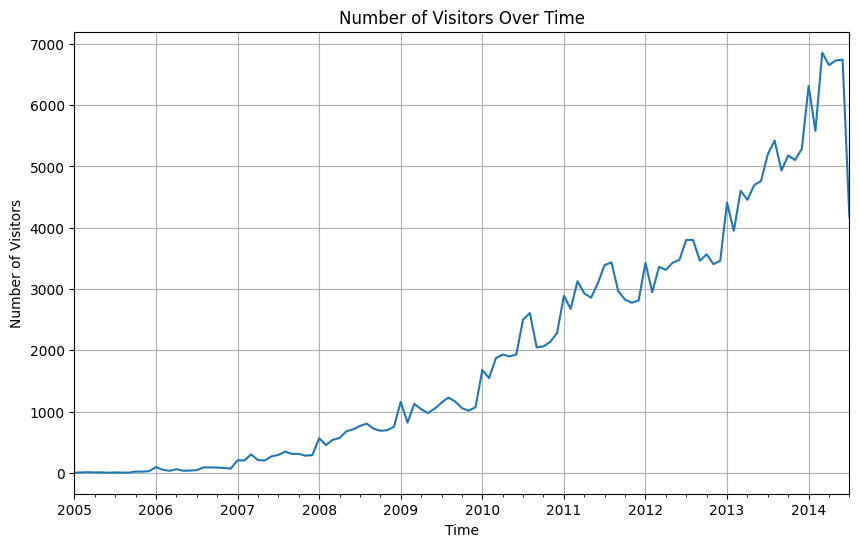

In [9]:
data['Review_Date'] = pd.to_datetime(data['Review_Date'])
visitor_trend = data.groupby(data['Review_Date'].dt.to_period('M')).size()


plt.figure(figsize=(10, 6))
visitor_trend.plot()
plt.title('Number of Visitors Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Visitors')
plt.grid(True)
plt.show()


8. Bonus Question – Based on this data set which user had the highest cumulative travel
distance? What distance has been covered by him/her?

In [35]:
data_dis = data[['User_ID', 'Latitude', 'Longitude']]
# data.groupby('User_ID').apply(print)

grouped_data = data_dis.groupby('User_ID')


# for key, item in grouped_data:
#     print(grouped_data.get_group(key))
# print(type(grouped_data))

def calculate_total_distance(group):
    total_distance = 0
    for i in range(len(group) - 1):
        coord1 = (group.iloc[i]['Latitude'], group.iloc[i]['Longitude'])
        coord2 = (group.iloc[i + 1]['Latitude'], group.iloc[i + 1]['Longitude'])
        total_distance += geodesic(coord1, coord2).kilometers
    return total_distance

total_distance_per_user = grouped_data.apply(calculate_total_distance)
# print(total_distance_per_user)

highest_distance_user = total_distance_per_user.idxmax()
highest_distance = total_distance_per_user.max()

print(f"User {highest_distance_user}")
print(f"Distance  {highest_distance:.2f} kilometers")

User WFpoTnMacPMtSmQTmJjp_Q
Distance  23887.77 kilometers


C:\Users\narmi\AppData\Local\Temp\ipykernel_16568\2908760506.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_distance_per_user = grouped_data.apply(calculate_total_distance)
